<a href="https://colab.research.google.com/github/mirzafaradiba01/Machine-Learning/blob/main/3A_18_Mirza_Priscilla_Faradiba_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA : MIRZA PRISCILLA FARADIBA**

**KELAS : TI-3A**

**NO.ABSEN : 18**

**KELOMPOK 1**

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. DOWNLOAD
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
- Merubah color space
- Reduksi dimensi
dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

Catatan:

1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

In [ ]:
# Import modul drive dari google.colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import semua library yang digunakan
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from google.colab.patches import cv2_imshow

In [ ]:
# Daftar path gambar plat
plat_paths = [
    '/content/drive/MyDrive/ML/plat1.jpg',
    '/content/drive/MyDrive/ML/plat2.jpg',
    '/content/drive/MyDrive/ML/plat 3.jpg',
    '/content/drive/MyDrive/ML/plat 4.jpg',
    '/content/drive/MyDrive/ML/plat 5.jpg'
]

In [27]:
# Fungsi untuk segmentasi gambar
def segment_image(img_path, k=2):
    # Load gambar
    img = cv2.imread(img_path)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, ch = img1.shape
    data = img1 / 255.0
    data = data.reshape(h * w, ch)

    #proses penggunaan algoritme K-Means untuk segmentasi gambar
    kmeans = MiniBatchKMeans(n_clusters=2, n_init=3)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    Z = np.float32(data)

    # menentukan nilai k
    kriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
    k = 2
    ret, label, center = cv2.kmeans(Z, k, None, kriteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    #proses segmentasi gambar menggunakan algoritma K-Means.
    segmented_data = center[label.flatten()]
    segmented_image = segmented_data.reshape((img1.shape))

    # Memanggil fungsi plot pixel
    plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

    # Memanggil fungsi img_comparison dengan citra asli dan citra hasil segmentasi
    img_comparison(img1, segmented_image)

In [28]:
# Fungsi untuk plot piksel
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=12)

In [29]:
# Fungsi untuk membandingkan gambar asli dan gambar yang telah di segmentasi.
def img_comparison(original, new_colors):
    segmented_img = new_colors.reshape(original.shape)
    fig, ax = plt.subplots(1, 2, figsize=(8, 2), subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)
    ax[0].imshow(original)
    ax[0].set_title('Original Image', size=12)
    ax[1].imshow(segmented_img)
    ax[1].set_title('2-color Image', size=12)

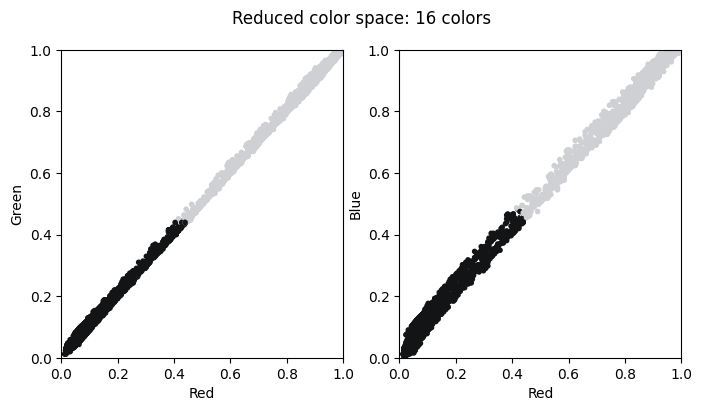

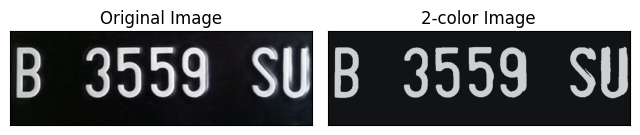

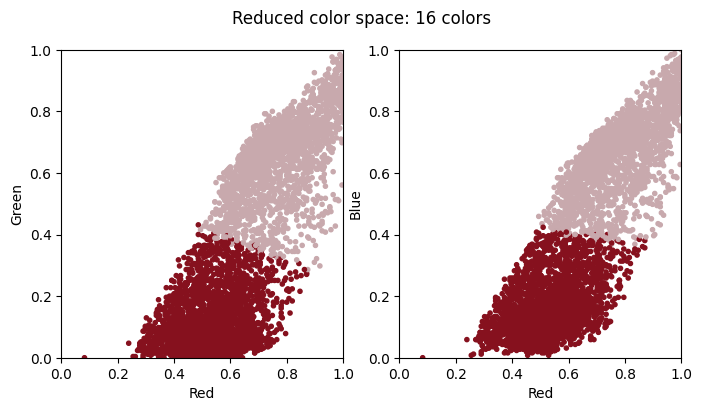

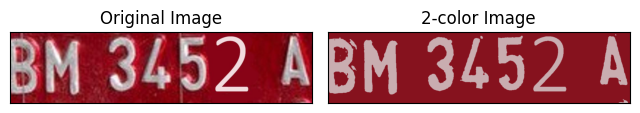

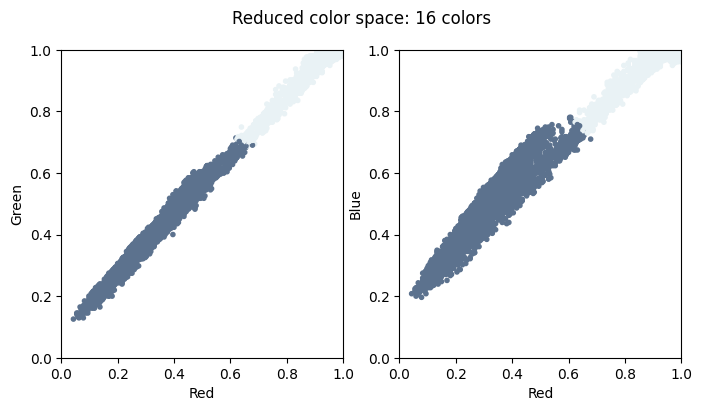

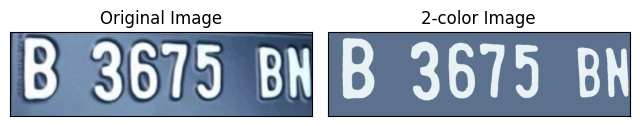

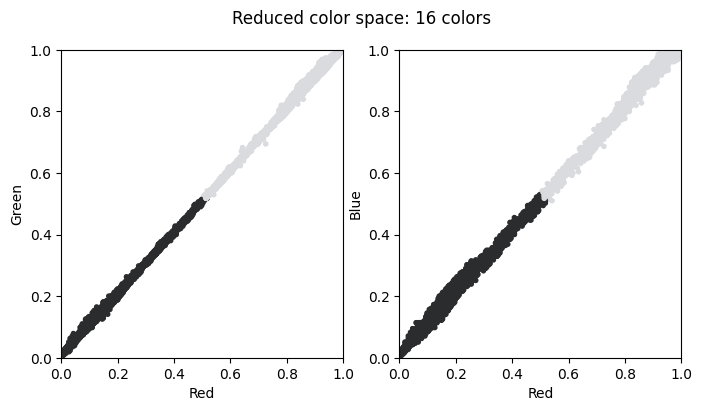

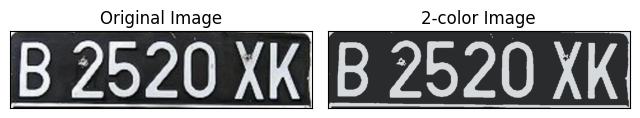

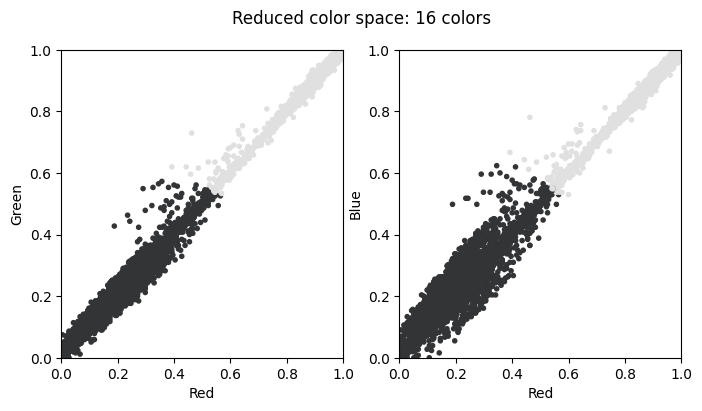

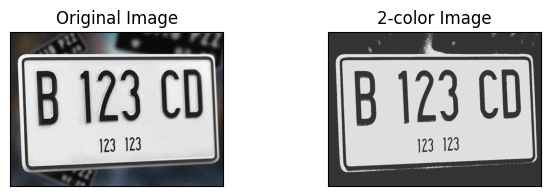

In [30]:
# Iterasi melalui gambar-gambar plat nomor dan melakukan segmentasi pada masing-masing
for plat_path in plat_paths:
    segment_image(plat_path)